In [1]:
!pip install "lightly-train[ultralytics]" "supervision==0.25.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.8/850.8 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━

In [1]:
from ultralytics.data.utils import check_det_dataset

dataset = check_det_dataset("VOC.yaml")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

Dataset 'VOC.yaml' images not found ⚠️, missing path '/content/datasets/VOC/images/test2007'


test2007: 100%|██████████| 4952/4952 [00:01<00:00, 3513.67it/s]

Dataset download success ✅ (61.2s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]


In [2]:
from ultralytics import settings

print(settings["datasets_dir"])

/content/datasets


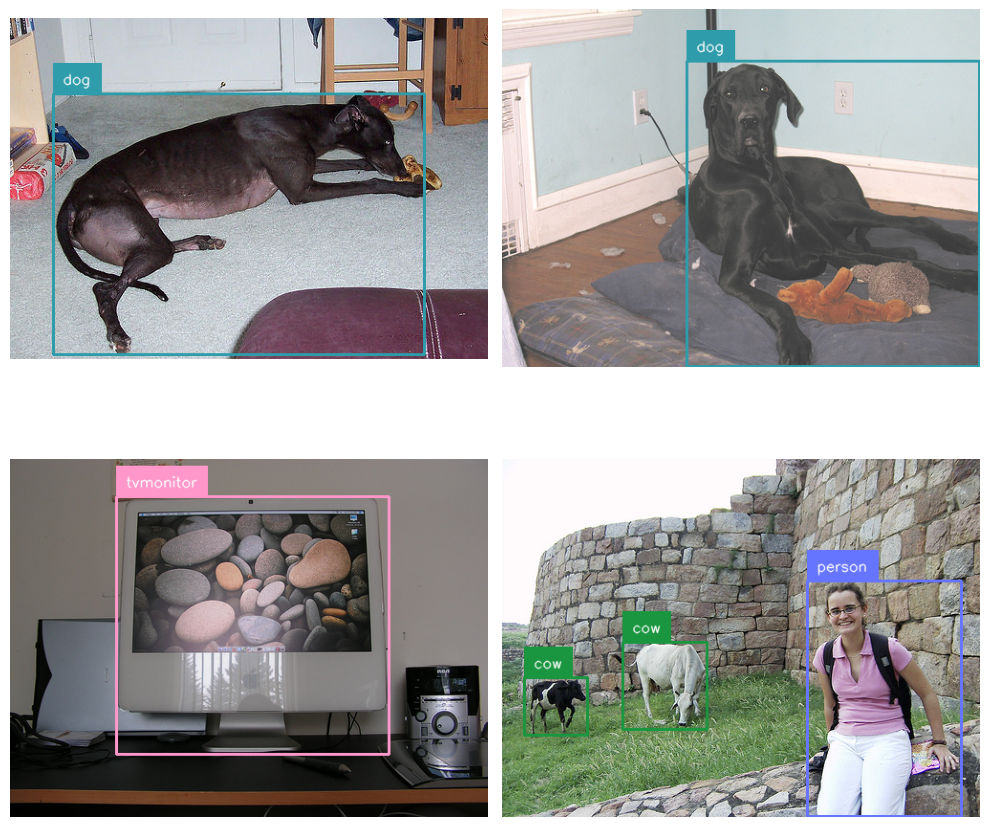

In [3]:
import random

import matplotlib.pyplot as plt
import supervision as sv
import yaml
from ultralytics import settings
from ultralytics.data.utils import check_det_dataset

dataset = check_det_dataset("VOC.yaml")

detections = sv.DetectionDataset.from_yolo(
    data_yaml_path=dataset["yaml_file"],
    images_directory_path="/content/datasets/VOC/images/train2012",
    annotations_directory_path="/content/datasets/VOC/labels/train2012",
)

with open(dataset["yaml_file"], "r") as f:
    data = yaml.safe_load(f)

names = data["names"]

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()

detections = [detections[random.randint(0, len(detections))] for _ in range(4)]

for i, (path, image, annotation) in enumerate(detections):
    annotated_image = box_annotator.annotate(scene=image, detections=annotation)
    annotated_image = label_annotator.annotate(
        scene=annotated_image,
        detections=annotation,
        labels=[names[elem] for elem in annotation.class_id],
    )
    ax[i].imshow(annotated_image[..., ::-1])
    ax[i].axis("off")

fig.tight_layout()
fig.show()

In [4]:
# pretrain_yolo.py
import lightly_train
from ultralytics import settings

data_path = "/content/datasets/VOC/images/train2012"

if __name__ == "__main__":
    # Pre-train with lightly-train.
    lightly_train.train(
        out="out/my_experiment",            # Output directory.
        model="ultralytics/yolo11s.yaml",   # Pass the YOLO model.
        data=data_path,                     # Path to a directory with training images.
        epochs=1,                         # Adjust epochs for faster training.
        batch_size=64,                      # Adjust batch size based on hardware.
    )


Args: {
    "accelerator": "auto",
    "batch_size": 64,
    "callbacks": null,
    "checkpoint": null,
    "data": "/content/datasets/VOC/images/train2012",
    "devices": "auto",
    "embed_dim": null,
    "epochs": 1,
    "loader_args": null,
    "loggers": null,
    "method": "distillation",
    "method_args": null,
    "model": "ultralytics/yolo11s.yaml",
    "model_args": null,
    "num_nodes": 1,
    "num_workers": "auto",
    "optim": "auto",
    "optim_args": null,
    "out": "out/my_experiment",
    "overwrite": false,
    "precision": "32-true",
    "resume": false,
    "seed": 0,
    "strategy": "auto",
    "trainer_args": null,
    "transform_args": null
}
INFO:lightly_train._commands.train:Args: {
    "accelerator": "auto",
    "batch_size": 64,
    "callbacks": null,
    "checkpoint": null,
    "data": "/content/datasets/VOC/images/train2012",
    "devices": "auto",
    "embed_dim": null,
    "epochs": 1,
    "loader_args": null,
    "loggers": null,
    "method": "dist

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Resolved configuration:
{
    "accelerator": "CUDAAccelerator",
    "batch_size": 64,
    "callbacks": {
        "device_stats_monitor": {},
        "early_stopping": {
            "check_finite": true,
            "monitor": "train_loss",
            "patience": 1000000000000
        },
        "learning_rate_monitor": {},
        "model_checkpoint": {
            "enable_version_counter": false,
            "every_n_epochs": null,
            "save_last": true,
            "save_top_k": 1
        }
    },
    "checkpoint": null,
    "data": "/content/datasets/VOC/images/train2012",
    "devices": 1,
    "embed_dim": null,
    "epochs": 1,
    "loader_args": null,
    "loggers": {
        "jsonl": {
            "flush_logs_every_n_steps": 100
        },
        "tensorboard": {
            "default_hp_metric": true,
            "log_graph": false,
            "name": "",
            "prefix": "",
            "sub_dir": null,
            "version": ""
        },
        "wandb": null
 

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
Training completed.
INFO:lightly_train._commands.train:Training completed.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/out/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
Example: How to use the exported model
----------------------------------------------------------------------------------------
from ultralytics import YOLO

# Load the pretrained model
model = YOLO('/content/out/my_experiment/exported_models/exported_last.pt')

# Finetune or evaluate the model
...
----------------------------------------------------------------------------------------

INFO:lightly_train._models.ultralytics.ultralytics_package:Example: How to use the exported model
----------------------------------------------------------------------------------------
from ultralytics import YOLO

# Load the pre

In [5]:
# finetune_yolo.py

from ultralytics import YOLO

if __name__ == "__main__":
    # Load the exported model.
    model = YOLO("out/my_experiment/exported_models/exported_last.pt")

    # Fine-tune with ultralytics.
    #model.train(data="VOC.yaml", epochs=100)


0: 480x640 (no detections), 47.1ms
Speed: 6.5ms preprocess, 47.1ms inference, 80.4ms postprocess per image at shape (1, 3, 480, 640)


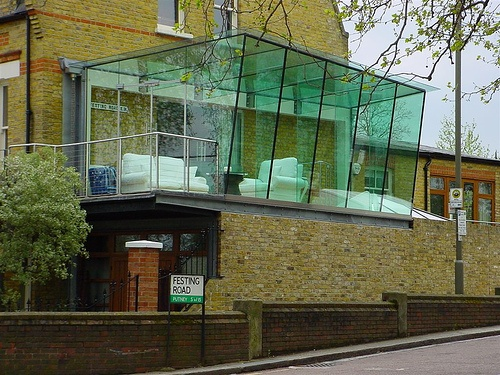

In [6]:
from ultralytics import YOLO



# Run batched inference on a list of images
results = model(["test.jpeg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk